In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-02-20_p180_bg_'
valid_code = '_val_24000_6000_'
postfix_time_seq_val = '_190815_713'
postfix_time_seq = '_190812_1645'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_p180"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__traindata_190815_713.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__val_24000_6000__testdata_190815_713.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__traindata_190812_1645.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-02-20_p180_bg__testdata_190812_1645.pkl
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                1800      
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 20)                1020

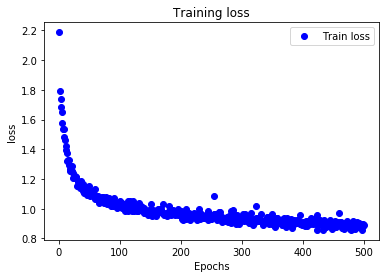

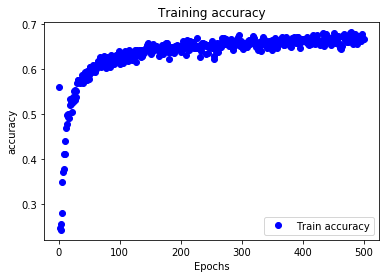

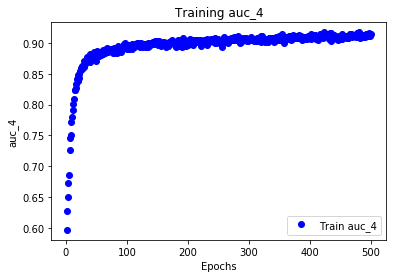

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 50)                1800      
_________________________________________________________________
dropout_26 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 20)                1020      
_________________________________________________________________
dropout_27 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_28 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)               

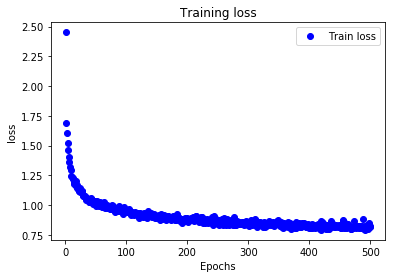

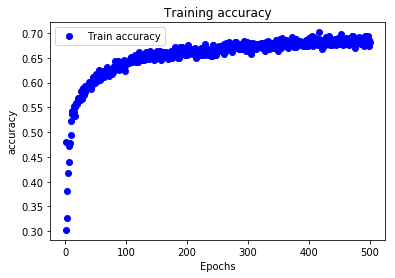

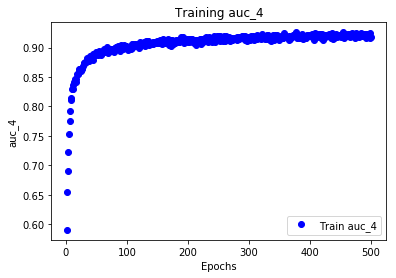

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 50)                1800      
_________________________________________________________________
dropout_29 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 20)                1020      
_________________________________________________________________
dropout_30 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_31 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)               

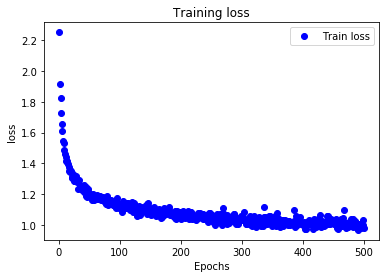

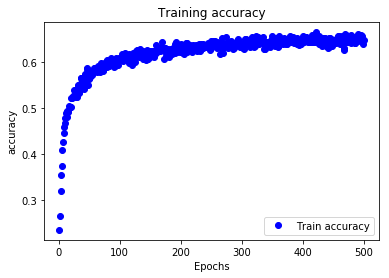

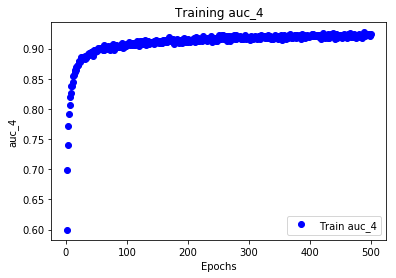

Validation AUC aggregating the results of 3 folds: 0.905201459475399

Retraining the model using the full training set for proper testing...
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 50)                1800      
_________________________________________________________________
dropout_32 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 20)                1020      
_________________________________________________________________
dropout_33 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_34 (Dropout)         (None, 5)      

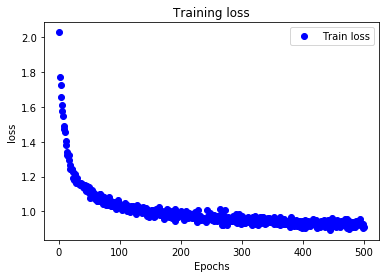

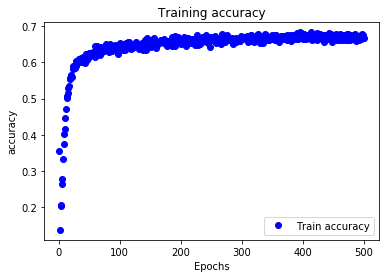

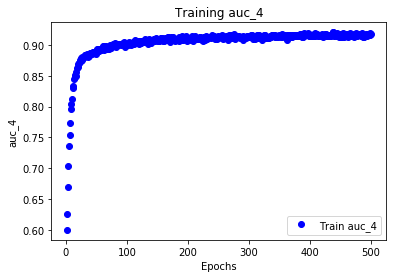

- Saving the model to ../data/models/MLP_enriched_time_seq24000_6000_p180/...
Saving model to ../data/models/MLP_enriched_time_seq24000_6000_p180/time_2018-02-20_p180_bg__sequential_10_190817_1930.h5
Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.45861 0.54139]
 [0.00077 0.00271]]
AUC 0.755
Confusion matrix:
[[7102 8384]
 [  12   42]]
- Activating existing experiment 'MLP_enriched_time_seq24000_6000_p180', the following results will be saved in it...
- Tracking the experiment on mlflow...
- Experiment tracked.


In [5]:
experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
            postfix_time_seq_val, valid_code, indexfile,
                     experiment_name=expname, 
                     hidden_layers_no=3,  #4
                     hidden_nodes=[50, 20, 5],             #[70, 45,30,15],
                     optimizer=Adam(0.001),
                     hl_activations=[tf.nn.relu]*3,       #[tf.nn.relu]*4,
                     dropout=[0.5]*3,            #[0.5]*2,
                     loss_func = tf.keras.losses.BinaryCrossentropy(),
                     metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                     to_monitor=('accuracy', 0.9),
                     validation_ep=True,
                     epochs=500, 
                     batch_size=64,
                     use_batch_and_steps=False,
                     class_1_weight=25,
                     pred_threshold = 0.55,
                     verbose=0,
                     early_stopping=True, 
                     save_model=True, 
                     save_results_for_viz=False,
                     mlf_tracking=True)